In [1]:
from PIL import Image, ImageOps
import pickle

In [2]:
train_images = pickle.load(open("pkl/train_images.pkl", "rb"))
test_images = pickle.load(open("pkl/test_images.pkl", "rb"))

In [3]:
def pad_and_resize(im):
    desired_size = 64
    old_size = im.size  # old_size[0] is in (width, height) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = im.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
    return new_im

In [4]:
preprocessed_train_images = []
preprocessed_test_images = []

for im in train_images:
    preprocessed_train_images.append(pad_and_resize(im))
for im in test_images:
    preprocessed_test_images.append(pad_and_resize(im))
len(preprocessed_train_images)

24204

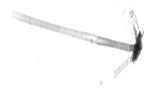

In [5]:
train_images[1]

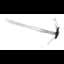

In [6]:
preprocessed_train_images[1]

In [7]:
pickle.dump( preprocessed_train_images, open( "pkl/preprocessed_train_images.pkl", "wb" ) )
pickle.dump( preprocessed_test_images, open( "pkl/preprocessed_test_images.pkl", "wb" ) )